# NBIO208. Statistical Testing in Python

The goal of this lesson is to introduce Python libraries, load and look at a dataset, begin some common statistical testing.  It includes:
- [1 The simplicity underlying common statistical tests](#anchor1)
- [2 The python environment](#anchor2)
- [A note about $p$-values](#anchor2b)
- [3 Pearson and Spearman correlation](#anchor3)
- [4 One mean comparisons](#anchor4)
- [5 Many mean comparisons](#anchor5)
- [6 Checking assumptions](#anchor6)
- [Resources](#anchor7)

<a name="anchor1"></a>
## 1 The simplicity underlying common statistical tests

Most of the common statistical models (t-test, correlation, ANOVA, chi-square, etc.) are special cases of linear models, or a very close approximation. This beautiful simplicity means that there is less to learn. In particular, it all comes down to $y = a \cdot x + b$, where $a$ is the slope of the line and $b$ is the y-intercept where the line crosses the y-axis. 

There are certain assumptions we check to use these "parametric tests."  When assumptions are not met, we have alternative "non-parametric" counterparts.  We will think of "non-parametric"" tests as ranked versions of the corresponding parametric tests. 

This lesson is adapted from [Tests as Linear](https://github.com/eigenfoo/tests-as-linear), which is also available [in R](https://github.com/lindeloev/tests-as-linear). 

**See the [Cheat Sheet](https://lindeloev.github.io/tests-as-linear/linear_tests_cheat_sheet.pdf)**

<a name="anchor2"></a>
## 2 The Python Environment

In part 2, we will:
<img src="https://github.com/DeisData/datasets/blob/main/Part2_steps.png?raw=true?raw=true" alt="drawing" style="width:350px;"/>

### 2.1.  Load libraries. <a class="anchor" id="bullet2"></a>
Think of these as useful powerful toolboxes we are opening up on our workbench. Many additional libraries are available from the Python Package Index.

we `import` some key scientific libraries, sometimes using a shorter *alias* for ease of coding, with the syntax `import library_name as alias_name` 

- [numpy](https://numpy.org) - adding support for large, multi-dimensional arrays and matrices, and mathematical functions for arrays.
- [pandas](https://pandas.pydata.org/) - offers data structures and operations for manipulating numerical tables and time series.
- [matplotlib](https://matplotlib.org/) - the most widely used scientific plotting library in Python.
- [seaborn](https://seaborn.pydata.org/) - for drawing attractive and informative statistical graphics.
- [statsmodels](https://www.statsmodels.org/stable/index.html) and [scipy](https://www.scipy.org/) for hypothesis testing and regression models.

In [ ]:
# [1]:
# Python libraries for data structures, arrays, and math
import numpy as np
import pandas as pd

# Libraris for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the statistics module
import statistics

# Library for hypothesis testing
import scipy

# Libraries for regression modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Library for latex 
from IPython.display import Latex, display, Markdown

### 2.2 Load data.<a class="anchor" id="bullet3"></a>
Loads a copy of the data into our environment.  Unlike working with a spreadsheet, it does not affect the original file.

*Our data*  This synthetic dataset contains information on new born babies and their parents.  It comes from [here](https://www.sheffield.ac.uk/mash/statistics/datasets). 

Read a Comma Separated Values (CSV) data file with `pd.read_csv()`. 
*[Need to read in a different file type?](https://realpython.com/pandas-read-write-files/)*
- Argument is the name of the file to be read.
- Assign result to a variable to store the data that was read.

In [ ]:
# url is the name and path of the data file
url = "https://raw.githubusercontent.com/DeisData/datasets/main/Birthweight_reduced_kg_R.csv"

# data is the name of the dataFrame we are storing our data in
# pd is pandas and read_csv is a tool in pandas for reading in a csv file
data = pd.read_csv(url)    

### 2.3. Inspect the data table <a class="anchor" id="bullet4"></a>
There are lots of functions and methods we can apply to the dataframe to start inspecting it.

<div class="alert alert-block alert-info">Functions attached to objects are called methods.  They are common in pandas.  Methods have parentheses like functions, but come after the variable.
</div>

In [ ]:
# Method to view head of dataset
data.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


<p class=MsoNormal><span lang=EN-GB>This dataset contains information on new
born babies and their parents.<span style='mso-spacerun:yes'>  </span>It
contains mostly continuous variables (although some have only a few values <span
class=GramE>e.g.</span> number of cigarettes smoked per day) and is most useful
for correlation and regression.<span style='mso-spacerun:yes'>  </span><span style='mso-spacerun:yes'> </span></span></p>

<p class=MsoNormal><span lang=EN-GB>Main dependent variable = Birthweight (lbs)</span></p>

<table class=MsoNormalTable border=0 cellspacing=0 cellpadding=0 width=600
 style='width:6.25in;margin-left:4.65pt;border-collapse:collapse;mso-yfti-tbllook:
 1184;mso-padding-alt:0in 5.4pt 0in 5.4pt'>
 <tr style='mso-yfti-irow:0;mso-yfti-firstrow:yes;height:21.0pt'>
  <td width=129 style='width:96.65pt;border-top:solid #4BACC6 1.0pt;border-left:
  solid #4BACC6 1.0pt;border-bottom:none;border-right:none;background:#4BACC6;
  padding:0in 5.4pt 0in 5.4pt;height:21.0pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:white;mso-themecolor:background1;mso-fareast-language:EN-GB'>Name</span></b><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:white;mso-fareast-language:EN-GB'><o:p></o:p></span></b></p>
  </td>
  <td width=316 style='width:237.25pt;border:none;border-top:solid #4BACC6 1.0pt;
  background:#4BACC6;padding:0in 5.4pt 0in 5.4pt;height:21.0pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:white;mso-themecolor:background1;mso-fareast-language:EN-GB'>Variable</span></b><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:white;mso-fareast-language:EN-GB'><o:p></o:p></span></b></p>
  </td>
  <td width=155 style='width:116.1pt;border-top:solid #4BACC6 1.0pt;border-left:
  none;border-bottom:none;border-right:solid #4BACC6 1.0pt;background:#4BACC6;
  padding:0in 5.4pt 0in 5.4pt;height:21.0pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:white;mso-themecolor:background1;mso-fareast-language:EN-GB'>Data type</span></b><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:white;mso-fareast-language:EN-GB'><o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:1;height:13.85pt'>
  <td width=129 style='width:96.65pt;border:solid #4BACC6 1.0pt;border-right:
  none;padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>ID<o:p></o:p></span></b></p>
  </td>
  <td width=316 style='width:237.25pt;border-top:solid #4BACC6 1.0pt;
  border-left:none;border-bottom:solid #4BACC6 1.0pt;border-right:none;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Baby number<o:p></o:p></span></p>
  </td>
  <td width=155 style='width:116.1pt;border:solid #4BACC6 1.0pt;border-left:
  none;padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'><o:p>&nbsp;</o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:2;height:13.85pt'>
  <td width=129 style='width:96.65pt;border-top:none;border-left:solid #4BACC6 1.0pt;
  border-bottom:solid #4BACC6 1.0pt;border-right:none;mso-border-top-alt:solid #4BACC6 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;length<o:p></o:p></span></b></p>
  </td>
  <td width=316 style='width:237.25pt;border:none;border-bottom:solid #4BACC6 1.0pt;
  mso-border-top-alt:solid #4BACC6 1.0pt;padding:0in 5.4pt 0in 5.4pt;
  height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Length of baby (cm)<o:p></o:p></span></p>
  </td>
  <td width=155 style='width:116.1pt;border-top:none;border-left:none;
  border-bottom:solid #4BACC6 1.0pt;border-right:solid #4BACC6 1.0pt;
  mso-border-top-alt:solid #4BACC6 1.0pt;padding:0in 5.4pt 0in 5.4pt;
  height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Scale<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:3;height:13.85pt'>
  <td width=129 style='width:96.65pt;border:none;border-left:solid #4BACC6 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;Birthweight<o:p></o:p></span></b></p>
  </td>
  <td width=316 style='width:237.25pt;padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Weight of baby (kg)<o:p></o:p></span></p>
  </td>
  <td width=155 style='width:116.1pt;border:none;border-right:solid #4BACC6 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Scale<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:4;height:13.85pt'>
  <td width=129 style='width:96.65pt;border:solid #4BACC6 1.0pt;border-right:
  none;padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;<span class=SpellE>headcirumference</span><o:p></o:p></span></b></p>
  </td>
  <td width=316 style='width:237.25pt;border-top:solid #4BACC6 1.0pt;
  border-left:none;border-bottom:solid #4BACC6 1.0pt;border-right:none;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Head Circumference<o:p></o:p></span></p>
  </td>
  <td width=155 style='width:116.1pt;border:solid #4BACC6 1.0pt;border-left:
  none;padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Scale<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:5;height:13.85pt'>
  <td width=129 style='width:96.65pt;border:none;border-left:solid #4BACC6 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;Gestation<o:p></o:p></span></b></p>
  </td>
  <td width=316 style='width:237.25pt;padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Gestation (weeks)<o:p></o:p></span></p>
  </td>
  <td width=155 style='width:116.1pt;border:none;border-right:solid #4BACC6 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Scale<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:6;height:13.85pt'>
  <td width=129 style='width:96.65pt;border:none;border-left:solid #4BACC6 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;smoker<o:p></o:p></span></b></p>
  </td>
  <td width=316 style='width:237.25pt;padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Mother smokes 1 = smoker 0 =
  non-smoker<o:p></o:p></span></p>
  </td>
  <td width=155 style='width:116.1pt;border:none;border-right:solid #4BACC6 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;Binary<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:7;height:13.85pt'>
  <td width=129 style='width:96.65pt;border:solid #4BACC6 1.0pt;border-right:
  none;padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;<span class=SpellE>motherage</span><o:p></o:p></span></b></p>
  </td>
  <td width=316 style='width:237.25pt;border-top:solid #4BACC6 1.0pt;
  border-left:none;border-bottom:solid #4BACC6 1.0pt;border-right:none;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Maternal age<o:p></o:p></span></p>
  </td>
  <td width=155 style='width:116.1pt;border:solid #4BACC6 1.0pt;border-left:
  none;padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Scale<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:8;height:12.35pt'>
  <td width=129 style='width:96.65pt;border-top:none;border-left:solid #4BACC6 1.0pt;
  border-bottom:solid #4BACC6 1.0pt;border-right:none;mso-border-top-alt:solid #4BACC6 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:12.35pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;<span class=SpellE>mnocig</span><o:p></o:p></span></b></p>
  </td>
  <td width=316 style='width:237.25pt;border:none;border-bottom:solid #4BACC6 1.0pt;
  mso-border-top-alt:solid #4BACC6 1.0pt;padding:0in 5.4pt 0in 5.4pt;
  height:12.35pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Number of cigarettes smoked per day
  by mother<o:p></o:p></span></p>
  </td>
  <td width=155 style='width:116.1pt;border-top:none;border-left:none;
  border-bottom:solid #4BACC6 1.0pt;border-right:solid #4BACC6 1.0pt;
  mso-border-top-alt:solid #4BACC6 1.0pt;padding:0in 5.4pt 0in 5.4pt;
  height:12.35pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Scale<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:9;height:13.85pt'>
  <td width=129 style='width:96.65pt;border:none;border-left:solid #4BACC6 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;<span class=SpellE>mheight</span><o:p></o:p></span></b></p>
  </td>
  <td width=316 style='width:237.25pt;padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  class=GramE><span lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:
  "Times New Roman";mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Mothers</span></span><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'> height (cm)<o:p></o:p></span></p>
  </td>
  <td width=155 style='width:116.1pt;border:none;border-right:solid #4BACC6 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;Scale<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:10;height:13.85pt'>
  <td width=129 style='width:96.65pt;border:none;border-left:solid #4BACC6 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;<span class=SpellE>mppwt</span><o:p></o:p></span></b></p>
  </td>
  <td width=316 style='width:237.25pt;padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  class=GramE><span lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:
  "Times New Roman";mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Mothers</span></span><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'> pre-pregnancy weight (kg)<o:p></o:p></span></p>
  </td>
  <td width=155 style='width:116.1pt;border:none;border-right:solid #4BACC6 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;Scale<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:11;height:13.85pt'>
  <td width=129 style='width:96.65pt;border:solid #4BACC6 1.0pt;border-right:
  none;padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;<span class=SpellE>fage</span><o:p></o:p></span></b></p>
  </td>
  <td width=316 style='width:237.25pt;border-top:solid #4BACC6 1.0pt;
  border-left:none;border-bottom:solid #4BACC6 1.0pt;border-right:none;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Father's age<o:p></o:p></span></p>
  </td>
  <td width=155 style='width:116.1pt;border:solid #4BACC6 1.0pt;border-left:
  none;padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;Scale<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:12;height:13.85pt'>
  <td width=129 style='width:96.65pt;border-top:none;border-left:solid #4BACC6 1.0pt;
  border-bottom:solid #4BACC6 1.0pt;border-right:none;mso-border-top-alt:solid #4BACC6 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  class=SpellE><b><span lang=EN-GB style='mso-ascii-font-family:Calibri;
  mso-fareast-font-family:"Times New Roman";mso-hansi-font-family:Calibri;
  mso-bidi-font-family:"Times New Roman";color:black;mso-fareast-language:EN-GB'>fedyrs</span></b></span><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'><o:p></o:p></span></b></p>
  </td>
  <td width=316 style='width:237.25pt;border:none;border-bottom:solid #4BACC6 1.0pt;
  mso-border-top-alt:solid #4BACC6 1.0pt;padding:0in 5.4pt 0in 5.4pt;
  height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Father’s years in education<o:p></o:p></span></p>
  </td>
  <td width=155 style='width:116.1pt;border-top:none;border-left:none;
  border-bottom:solid #4BACC6 1.0pt;border-right:solid #4BACC6 1.0pt;
  mso-border-top-alt:solid #4BACC6 1.0pt;padding:0in 5.4pt 0in 5.4pt;
  height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Scale<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:13;height:13.85pt'>
  <td width=129 style='width:96.65pt;border-top:none;border-left:solid #4BACC6 1.0pt;
  border-bottom:solid #4BACC6 1.0pt;border-right:none;mso-border-top-alt:solid #4BACC6 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;<span class=SpellE>fnocig</span><o:p></o:p></span></b></p>
  </td>
  <td width=316 style='width:237.25pt;border:none;border-bottom:solid #4BACC6 1.0pt;
  mso-border-top-alt:solid #4BACC6 1.0pt;padding:0in 5.4pt 0in 5.4pt;
  height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Number of cigarettes smoked per day
  by father<o:p></o:p></span></p>
  </td>
  <td width=155 style='width:116.1pt;border-top:none;border-left:none;
  border-bottom:solid #4BACC6 1.0pt;border-right:solid #4BACC6 1.0pt;
  mso-border-top-alt:solid #4BACC6 1.0pt;padding:0in 5.4pt 0in 5.4pt;
  height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Scale<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:14;height:13.85pt'>
  <td width=129 style='width:96.65pt;border-top:none;border-left:solid #4BACC6 1.0pt;
  border-bottom:solid #4BACC6 1.0pt;border-right:none;mso-border-top-alt:solid #4BACC6 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;<span class=SpellE>fheight</span><o:p></o:p></span></b></p>
  </td>
  <td width=316 style='width:237.25pt;border:none;border-bottom:solid #4BACC6 1.0pt;
  mso-border-top-alt:solid #4BACC6 1.0pt;padding:0in 5.4pt 0in 5.4pt;
  height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Father's height (kg)<o:p></o:p></span></p>
  </td>
  <td width=155 style='width:116.1pt;border-top:none;border-left:none;
  border-bottom:solid #4BACC6 1.0pt;border-right:solid #4BACC6 1.0pt;
  mso-border-top-alt:solid #4BACC6 1.0pt;padding:0in 5.4pt 0in 5.4pt;
  height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;Scale<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:15;height:13.85pt'>
  <td width=129 style='width:96.65pt;border-top:none;border-left:solid #4BACC6 1.0pt;
  border-bottom:solid #4BACC6 1.0pt;border-right:none;mso-border-top-alt:solid #4BACC6 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;<span class=SpellE>lowbwt</span><o:p></o:p></span></b></p>
  </td>
  <td width=316 style='width:237.25pt;border:none;border-bottom:solid #4BACC6 1.0pt;
  mso-border-top-alt:solid #4BACC6 1.0pt;padding:0in 5.4pt 0in 5.4pt;
  height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Low birth weight, 0 = No and 1 = yes<o:p></o:p></span></p>
  </td>
  <td width=155 style='width:116.1pt;border-top:none;border-left:none;
  border-bottom:solid #4BACC6 1.0pt;border-right:solid #4BACC6 1.0pt;
  mso-border-top-alt:solid #4BACC6 1.0pt;padding:0in 5.4pt 0in 5.4pt;
  height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>&nbsp;Binary<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:16;mso-yfti-lastrow:yes;height:13.85pt'>
  <td width=129 style='width:96.65pt;border-top:none;border-left:solid #4BACC6 1.0pt;
  border-bottom:solid #4BACC6 1.0pt;border-right:none;mso-border-top-alt:solid #4BACC6 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>mage35<o:p></o:p></span></b></p>
  </td>
  <td width=316 style='width:237.25pt;border:none;border-bottom:solid #4BACC6 1.0pt;
  mso-border-top-alt:solid #4BACC6 1.0pt;padding:0in 5.4pt 0in 5.4pt;
  height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Mother over 35, 0 = No and 1 = yes<o:p></o:p></span></p>
  </td>
  <td width=155 style='width:116.1pt;border-top:none;border-left:none;
  border-bottom:solid #4BACC6 1.0pt;border-right:solid #4BACC6 1.0pt;
  mso-border-top-alt:solid #4BACC6 1.0pt;padding:0in 5.4pt 0in 5.4pt;
  height:13.85pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  lang=EN-GB style='mso-ascii-font-family:Calibri;mso-fareast-font-family:"Times New Roman";
  mso-hansi-font-family:Calibri;mso-bidi-font-family:"Times New Roman";
  color:black;mso-fareast-language:EN-GB'>Binary<o:p></o:p></span></p>
  </td>
 </tr>
</table>


**Your turn to explore!** Uncomment and try more Pandas methods we can apply to our dataframe:

In [ ]:
# TRY THESE!
# Method to see the tail end of the data
# data.tail()

# Use the DataFrame.info() method to find out more about a dataframe.
# data.info()

# Get Dimensions (rows, columns)
# data.shape

# Get data types
# data.dtypes

# The DataFrame.columns variable stores information about the dataframe’s columns.
# data.columns

In [ ]:
# Use DataFrame.describe() to get summary statistics about data.
# data.describe()

<div class="alert alert-block alert-info">
    <ul><li>Use the Pandas library to get basic statistics out of tabular data.</li>

<li>Use `index_col` to specify that a column’s values should be used as row headings.</li>

<li>Use `DataFrame.info` to find out more about a dataframe.</li>

<li>The `DataFrame.columns` variable stores information about the dataframe’s columns.</li>

<li>Use `DataFrame.T` to transpose a dataframe.</li>

<li>Use `DataFrame.describe` to get summary statistics about data.</li></ul>
</div>

<a name="anchor2b"></a>
## A note about $p$-values

When we are doing statistical testing, we form a null hypothesis that states that there is no relationship, either between the two variables being studied (one variable does not affect the other), or between a variable and some constant number like a population mean. 

The $p$-value, or probability value, returned with your statistical test is a number describing how likely it is that your data would have occurred by random chance (i.e. that the null hypothesis is true).  It is a number between 0 and 1.  The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.  A common threshold of significance is $p < 0.05$. 

<img src="https://github.com/DeisData/datasets/blob/main/p-value.png?raw=true" alt="drawing" style="width:450px;"/>

*Image from [What a p-value tells you about statistical significance](https://www.simplypsychology.org/p-value.html)*

There is a lot of conversation around use and [mis-use of $p$-values](https://en.wikipedia.org/wiki/Misuse_of_p-values) in scientific analysis.  Here are a few articles you may find interesting:
- ["After p values: The new statistics for undergraduate neuroscience education"](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5777847/)
- ["Estimation for better inference in neuroscience"](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6709209/) 


<a name="anchor3"></a>
## 3 Pearson and Spearman correlation

### 3.1 Theory: As linear models 

**Model:** the recipe for $y$ is a slope ($\beta_1$) times $x$ plus an y-intercept ($\beta_0$, aka a straight line).

$y = \beta_0 + \beta_1 x \qquad \mathcal{H}_0: \beta_1 = 0$

... which is a mathy way of writing the good old $y = ax + b$ (here ordered as $y = b + ax$). The task of linear models is simply to find the numbers that best predict `y`.

Either way you write it, it's an intercept ($\beta_0$) and a slope ($\beta_1$) yielding a straight line.

**With our data**
we can use the seaborn regression plot tool `sns.regplot`to quickly visualize a linear model fit between mother's height `mheight` and baby length `Length` when asking the question "Can moether's height predict baby length?"

<AxesSubplot:xlabel='mheight', ylabel='Length'>

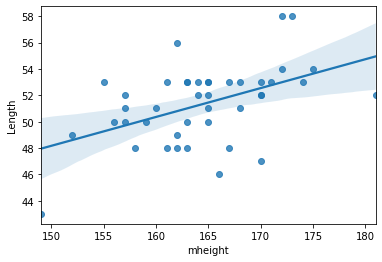

In [ ]:
sns.regplot(x='mheight',y='Length',data=data)

**Practice for you**. Use the seaborn regression tool to visualize a simple linear regression to consider the question: "Can gestational age (`Gestation`) predict baby weight (`Birthweight`)?"

In [ ]:
# Your code goes here!:
#sns.regplot()


This is often simply called a *regression* model which can be extended to *multiple regression* where there are several $\beta$s and on the right-hand side multiplied with the predictors. 

Everything below, from [one-sample t-test](#4.1-One-sample-t-test-and-Wilcoxon-signed-rank) to [two-way ANOVA](#6.2-Two-way-ANOVA) are just special cases of this system. Nothing more, nothing less.

### 3.2 Pearson correlation
We use [`scipy.stats.pearsonr`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html) to calculate a pearson correlation coefficient and the p-value for testing non-correlation between two variables. Correlations of $-1$ or $+1$ imply an exact linear relationships, and 0 implies no correlation. 

In [ ]:
# pearsonr returns the pearson's correlation coefficient and 
# the 2-tailed p-value
stats.pearsonr(data.mheight, data.Length)

<IPython.core.display.Javascript object>

(0.4849924026326507, 0.0011331311458135573)

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets.

**Practice for you**. Calculate the Pearson's R for the question: "Can gestational age (`Gestation`) predict baby weight (`Birthweight`)?"

In [ ]:
# Your code goes here!:


### 3.3 Spearman rank correlation

As the name implies, the *Spearman rank correlation* is a *Pearson correlation* on rank-transformed $x$ and $y$:

$\text{rank}(y) = \beta_0 + \beta_1 \cdot \text{rank}(x) \qquad \mathcal{H}_0: \beta_1 = 0$

I'll introduce [ranks](#3.4-Theory:-Rank-transformation) in a minute. For now, notice that the correlation coefficient of the linear model is identical to a "real" Pearson correlation, but p-values are an approximation which is is [appropriate for samples greater than N = 10 and almost perfect when N > 20](https://lindeloev.github.io/tests-as-linear/simulations/simulate_spearman.html).

Such a nice and non-mysterious equivalence!

The Spearman rank-order correlation coefficient is a *nonparametric measure* of the relationship between two variables. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. 

We will use [`scipy.stats.spearmanr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) to calculate the Spearman correlation coefficient with associated p-value.

In [ ]:
# spearmanr returns the rank correlation coefficient and 
# the 2-tailed p-value
stats.spearmanr(data.mheight, data.Length)

<IPython.core.display.Javascript object>

SpearmanrResult(correlation=0.4553274463786581, pvalue=0.002446213023703486)

**Practice for you**. Calculate the Spearman's R for the question: "Can gestational age (`Gestation`) predict baby weight (`Birthweight`)?"

In [ ]:
# Your code goes here!:


### 3.4 Theory: Rank-transformation
`scipy.stats.rankdata` simply takes an array of numbers and "replaces" them with the integers of their rank (1st smallest, 2nd smallest, 3rd smallest, etc.). `pd.DataFrame.rank` performs a similar function, but with support for `pandas.DataFrames`. So the result of the rank-transformation `scipy.stats.rankdata([3.6, 3.4, -5.0, 8.2])` is `[3, 2, 1, 4]`. See that in the figure above?

A _signed_ rank is the same, just where we rank according to absolute size first and then add in the sign second. So the signed rank here would be `[2, 1, -3, 4]`. Or in code:

In [ ]:
def signed_rank(df):
    return np.sign(df) * df.abs().rank()

Ranks are all you need to do to convert most parametric tests into their "non-parametric" counterparts! 

#### Quick Aside:  Can we look at all the quantitative data at once?
`sns.pairplot()` from seaborn combines joint and marginal views — but rather than focusing on a single relationship, it visualizes every pairwise combination of variables simultaneously:

In [ ]:
# Uncomment and run to see a matrix of all relationships, color-coded by smoker / non-smoker
# sns.pairplot(data=data, hue="smoker")


***

<a name="anchor4"></a>
## 4 One mean comparisons

### 4.1 One sample t-test and Wilcoxon signed-rank

The T-test and Wilcoxon signed-rank test calculate probability for the mean of ONE group of scores.  This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.


#### 4.1.1 Theory: As linear models

**t-test** model: A single number predicts $y$.

$y = \beta_0 \qquad \mathcal{H}_0: \beta_0 = 0$

In other words, it's our good old $y = \beta_0 + \beta_1*x$ where the last term is gone since there is no $x$ (essentially $x=0$).

The same is to a very close approximately true for **Wilcoxon signed-rank test**, just with the [signed ranks](#3.0.2-Theory:-rank-transformation) of $y$ instead of $y$ itself.

$\text{signed_rank}(y) = \beta_0$

[This approximation is good enough when the sample size is larger than 14 and almost perfect if the sample size is larger than 50](https://lindeloev.github.io/tests-as-linear/simulations/simulate_wilcoxon.html).

We will use [`scipy.stats.ttest_1samp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html) for the parametric comparison test, and [`scipy.stats.wilcoxon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html) for the non-parametric comparison test.

#### 4.1.2 Python code: One-sample t-test

Try running the Python code below and see that the linear model (`smf.ols`) produces the same $t$, $p$, and $r$ as `scipy.stats.ttest_1samp`. 

First, we extract the subsets of data for smokers and non-smokers.

In [ ]:
# Average of non-smoker mother birthweights
data_nonsmokers = data[data.smoker==0]
data_smokers = data[data.smoker==1]

Next, we will calculate the average birthweight for each group.

In [ ]:
avg_birthwgt_nonsmoker = statistics.mean(data_nonsmokers.Birthweight)
avg_birthwgt_smoker = statistics.mean(data_smokers.Birthweight)

print(avg_birthwgt_nonsmoker, avg_birthwgt_smoker)

3.5095 3.1340909090909093


Let's compare the data for smoker's to the average birthweight from a non-smoking mother.

In [ ]:
t, p = stats.ttest_1samp(data_smokers.Birthweight, avg_birthwgt_nonsmoker)
print(t,p)

<IPython.core.display.Javascript object>

-2.7894379594885215 0.010986630284506064


and the equivalent linear model with an intercept-only is fit with `smf.ols`, the tool for ordinary least squares linear regression.  If we want to make an equivalent comparison, we will shift the birthweight data by the average birthweight for non-smokers, and then see what the linear model looks like!

In [ ]:
# We will shift the birthweight data by the average for non-smoker
# and store the result in a new column, Birthweight_adj
data["Birthweight_adj"] = data["Birthweight"]-avg_birthwgt_nonsmoker
data_smokers.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
20,792,53,3.64,38,40,1,20,2,170,59,24,12,12,185,0,0
21,1388,51,3.14,33,41,1,22,7,160,53,24,16,12,176,0,0
22,575,50,2.78,30,37,1,19,7,165,60,20,14,0,183,0,0
23,569,50,2.51,35,39,1,22,7,159,52,23,14,25,200,1,0
24,1363,48,2.37,30,37,1,20,7,163,47,20,10,35,185,1,0


In [ ]:
# Equivalent linear model: intercept-only
res = smf.ols(formula="Birthweight_adj ~ 1", data=data[data.smoker==1]).fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        Birthweight_adj   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 26 Aug 2021   Prob (F-statistic):                nan
Time:                        13:25:46   Log-Likelihood:                -20.584
No. Observations:                  22   AIC:                             43.17
Df Residuals:                      21   BIC:                             44.26
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3754      0.135     -2.789      0.0

Notice that the `t` statistics and `p` values for the linear model and t-test the same!

#### 4.1.2 Python code: One-sample  Wilcoxon signed-rank test
We use [`scipy.stats.wilcoxon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html) for the non-parametric comparison test and compare it to the $p$-value for a ranked data linear model.

In [ ]:
stats.wilcoxon(data[data.smoker==1].Birthweight_adj)

<IPython.core.display.Javascript object>

WilcoxonResult(statistic=51.0, pvalue=0.01272726058959961)

In [ ]:
signed_rank_data = signed_rank(data[data.smoker==1])
res = smf.ols("Birthweight_adj ~ 1", data=signed_rank_data).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        Birthweight_adj   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 26 Aug 2021   Prob (F-statistic):                nan
Time:                        13:25:46   Log-Likelihood:                -84.360
No. Observations:                  22   AIC:                             170.7
Df Residuals:                      21   BIC:                             171.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.8636      2.443     -2.809      0.0

### 4.2 Paired samples t-test and Wilcoxon matched pairs

A paired t-test or matched pairs test is used when we are interested in the difference between two variables for the same subject. Often the two variables might be measurements that are separated by time (e.g. cholesterol levels before and after a special diet). 

#### 4.2.1 Theory: As linear models

**t-test** model: a single number (intercept) predicts the pairwise differences.

$y_2-y_1 = \beta_0 \qquad \mathcal{H}_0: \beta_0 = 0$

This means that there is just one $y = y_2 - y_1$ to predict and it becomes a [one-sample t-test](#4.1-One-sample-t-test-and-Wilcoxon-signed-rank) on the pairwise differences. The idea is therefore also the same as for the one-sample t-test. 

Similarly, the **Wilcoxon matched pairs** only differ from **Wilcoxon signed-rank** in that it's testing the signed ranks of the pairwise $y_2-y_1$ differences.

$\text{signed_rank}(y_2-y_1) = \beta_0 \qquad \mathcal{H}_0: \beta_0 = 0$

**Let's load some data with matched pairs** from a study tested whether cholesterol was reduced after using a certain brand of margarine as part of a low fat, low cholesterol diet. 

The subjects consumed on average 2.31g of the active ingredient, stanol easter, a day. This data set contains information on 18 people using margarine to reduce cholesterol over three time points.

In [ ]:
url = "https://raw.githubusercontent.com/DeisData/datasets/main/Cholesterol_R.csv"
data_matched = pd.read_csv(url)
data_matched.head()

,ID,Before,After4weeks,After8weeks,Margarine
0,1,6.42,5.83,5.75,B
1,2,6.76,6.20,6.13,A
2,3,6.56,5.83,5.71,B
3,4,4.80,4.27,4.15,A
4,5,8.43,7.71,7.67,B


Text(0.5, 0, 'Patient ID')

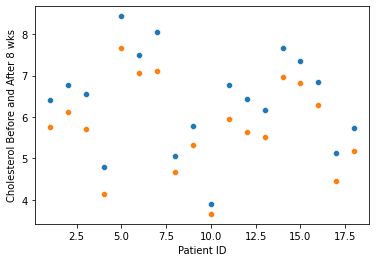

In [ ]:
# Plot the data for each ID, Before and After 8 weeks
fig, ax = plt.subplots()
sns.scatterplot(x='ID',y='Before',data=data_matched, ax=ax)
sns.scatterplot(x='ID',y='After8weeks',data=data_matched, ax=ax)
ax.set_ylabel('Cholesterol Before and After 8 wks')
ax.set_xlabel('Patient ID')

#### 4.2.2 Python code: Paired sample t-test

In [ ]:
t, p = scipy.stats.ttest_rel(data_matched.After8weeks, data_matched.Before)
print(t,p)

-14.945967764585072 3.27857534017563e-11


In [ ]:
# Let's add a column to our dataFrame subtracting the difference in cholesterol measures
data_matched["cholesterol_diff"] = data_matched.After8weeks - data_matched.Before
data_matched.head()

,ID,Before,After4weeks,After8weeks,Margarine,cholesterol_diff
0,1,6.42,5.83,5.75,B,-0.67
1,2,6.76,6.20,6.13,A,-0.63
2,3,6.56,5.83,5.71,B,-0.85
3,4,4.80,4.27,4.15,A,-0.65
4,5,8.43,7.71,7.67,B,-0.76


In [ ]:
# The ttest_rel is similar to calculating the difference in y values for each match, and 
# fitting a linear model
res = smf.ols(formula="cholesterol_diff ~ 1", data=data_matched).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       cholesterol_diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 26 Aug 2021   Prob (F-statistic):                nan
Time:                        13:25:47   Log-Likelihood:                 5.9885
No. Observations:                  18   AIC:                            -9.977
Df Residuals:                      17   BIC:                            -9.087
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6289      0.042    -14.946      0.0

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


You will notice the `t` statistics and `p` values are similar for the Paired T-test and a linear fit of the difference in the matched data.

#### 4.2.3 Python code: Wilcoxon matched pairs

Again, we do the signed-ranks trick. This is still an approximation, but a close one:

In [ ]:
stats.wilcoxon(data_matched.After8weeks, data_matched.Before)


<IPython.core.display.Javascript object>

WilcoxonResult(statistic=0.0, pvalue=7.62939453125e-06)

**Practice for you.**  Compare the matched data after 4 weeks and after 8 weeks.  What are the results of the paired sample t-test? Of the Wilcoxon matched pairs test?

In [ ]:
# Your code goes here!:



***

<a name="anchor5"></a>

# 5 Many mean comparisons

ANOVAs are linear models with categorical predictors.  The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.


### 5.1 Theory: As linear models

Model: One mean for each group predicts $y$.

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +... \qquad \mathcal{H}_0: y = \beta_0$

where $x_i$ are indicators ($x=0$ or $x=1$) where at most one $x_i=1$ while all others are $x_i=0$. 

Notice how this is just "more of the same" of what we already did in other models above. When there are only two groups, this model is $y = \beta_0 + \beta_1*x$, i.e. the independent t-test. If there is only one group, it is $y = \beta_0$, i.e. the one-sample t-test.

Since we now regress on more than one $x$, the one-way ANOVA is a **multiple regression** model.

The **Kruskal-Wallis** test is simply a **one-way ANOVA** on the rank-transformed $y$ (`value`):

$\text{rank}(y) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +...$

This approximation is [good enough for 12 or more data points](https://lindeloev.github.io/tests-as-linear/simulations/simulate_kruskall.html). 

### 5.2 Example data

We make a two-level factor with the `Margarine` levels `A` and `B`, so that the **one-way ANOVA** basically becomes a "two-sample t-test". We will test the null hypothesis that the two groups have the same population mean of cholesterol level after 8 weeks.

In [ ]:
data_matched.head()

,ID,Before,After4weeks,After8weeks,Margarine,cholesterol_diff
0,1,6.42,5.83,5.75,B,-0.67
1,2,6.76,6.20,6.13,A,-0.63
2,3,6.56,5.83,5.71,B,-0.85
3,4,4.80,4.27,4.15,A,-0.65
4,5,8.43,7.71,7.67,B,-0.76


### 5.3 Analysis of variance [ANOVA](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)
The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.  We will see how to test these in **6. Checking Assumptions**

- The samples are independent. 

- Each sample is from a normally distributed population. [KS Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html)

- The population standard deviations of the groups are all equal. This property is known as homoscedasticity. [Bartlett Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html)

Let's see scipy's dedicated ANOVA function `scipy.stats.f_oneway`.

In [ ]:
# Extract subsets of data
data_matched_A = data_matched[data_matched.Margarine=='A']
data_matched_B = data_matched[data_matched.Margarine=='B']

scipy.stats.f_oneway(data_matched_A.After8weeks,
                    data_matched_B.After8weeks)

F_onewayResult(statistic=1.2662631426081903, pvalue=0.27706640602454957)

### 5.4 Kruskal-Wallis H-test
If ANOVA assumptions are not met, we can consider a non-parametric test.
The [Kruskal-Wallis H-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html) (`scipy.stats.kruskal`) tests the null hypothesis that the population median of all of the groups are equal. 


In [ ]:
# Notice here, we have combined the steps of extracting subsets of data,  
# accessing the .After8weeks column from the subset,
# and doing the Kruskal test!  Python is powerful!

stats.kruskal(data_matched[data_matched.Margarine=='A'].After8weeks,
                    data_matched[data_matched.Margarine=='B'].After8weeks)

# Python starts working inside the parentheses, just like algebra.

<IPython.core.display.Javascript object>

KruskalResult(statistic=1.0311890838206494, pvalue=0.3098795496397732)

Do Not Reject the hypothesis that median cholesterol levels at 8 weeks are equal for the Margarine A and Margarine B groups.

### 5.5 **CHALLENGE for you!**  
Think back to the Birthweight `data`.  Can you set up a test of equal means for the birthweights measured from four groups of mothers who are:
- over 35 and smoke
- over 35 and do not smoke
- under 35 and smoke
- under 35 and do not smoke

In [ ]:
# Try it here!: 


<a name="anchor6"></a>

## 6. Checking Assumptions

Parametric tests like the t-tests and ANOVA have important assumptions that must be satisfied in order for the associated p-value to be valid, including:  

- The samples are independent. 
- Each sample is from a normally distributed population.
- The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

Here are just a few tools to check some of these assumptions.


### 6.1 Checking normality (Gaussian distribution)

Baby weight is normally distributed (i.e. bell-shaped.)  We can check this visually with a histogram `sns.histplot` and with the [Kolmogorv Smirnov Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) `scipy.stats.kstest`

<IPython.core.display.Javascript object>

KstestResult(statistic=0.9725710502961632, pvalue=5.07943581694757e-66)

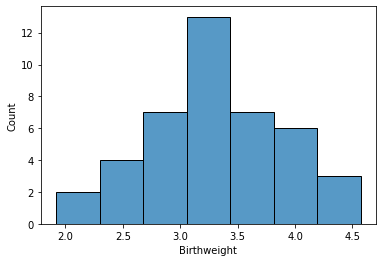

In [ ]:
# [68]
# Are the samples normally distributed?
sns.histplot(data.Birthweight)
stats.kstest(data.Birthweight,'norm')


**Your turn** Is the number of cigarettes smoked per day normally distributed?

In [ ]:
# Try it here!:


### 6.2 Checking heteroscedasticity

The population standard deviations of the groups are all equal. This property is known as homoscedasticity. One of several tests available to check this is the [Bartlett Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html) `scipy.stats.bartlett`.

In [ ]:
# Are the standard deviations equal for the smokers and non-smokers birthweight data?
stats.bartlett(data_smokers.Birthweight, data_nonsmokers.Birthweight)

<IPython.core.display.Javascript object>

BartlettResult(statistic=0.743871469606483, pvalue=0.38842352374096334)

**Practice for you**:  Are the standard deviations of birthweight data equal for the groups of over 35 and under 35 mothers?

In [ ]:
# Try it here:


**Key Points**

   * Hypothesis testing and p-values give you the **significance** of an
     effect / difference.
     
   * Parametric and Non-parametric tests are special cases of linear models!

   * **Regressions**  enable you to express rich
     links in your data.

   * **Visualizing** your data and fitting simple models give insight into the 
     data.


***
<a name="anchor7"></a>

## Resources   <a class="anchor" id="resources"></a>
- This workshop follows [Tests-as-linear](https://lindeloev.github.io/tests-as-linear/)
- See more about [Scientific Computing](https://guides.library.brandeis.edu/science/computing) and [Python](https://guides.library.brandeis.edu/c.php?g=1150530&p=8519775) on our [Science Services library guide](https://guides.library.brandeis.edu/science)
- Request 1-1 consultations with [Brandeis Data Services](https://guides.library.brandeis.edu/dataservices)
- Take time with tutorials at [Kaggle.com](https://www.kaggle.com/learn)
- [Brandeis LinkedIn Learning portal](https://www.brandeis.edu/its/support/linkedin-learning/index.html)
- [Stackoverflow](https://stackoverflow.com/)
- [Statsmodels User Guide](https://www.statsmodels.org/stable/user-guide.html)
- [Think stats](http://greenteapress.com/wp/think-stats-2e) book
- [Pandas Getting Started Tutorials](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)
- Data Visualization:  [Python Graph Gallery](https://python-graph-gallery.com/)
- [Seaborn example gallery](http://seaborn.pydata.org/examples/) 